
 # Project: WeRateDogs Data Wrangling

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#Gathering">Gathering Data</a></li>
<li><a href="#Assessing">Assessing Data</a></li>
<li><a href="#Cleaning">Cleaning Data</a></li>
<li><a href="#Storing">Storing Data</a></li>
<li><a href="#Analyzing and Visualizing">Analyzing and Visualizing Data Data</a></li>
<li><a href="#conclusion">Conclusion</a></li>
</ul>

## Introduction

Data Wrangling is an essential part of data analysis process. That is the focus of this project. The project's goal is to wrangle the WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations.

Data for this project will be gathered from three different sources - from available data (data in hand), from Udacity's servers and from Twitter's API. The data will be assessed for both quality and tidiness issues and then cleaned and stored. In the end, a master data will be produced. This data will then be used for analysis and visualization.

The following questions will be answerd in the analysis stage: What are 10 most common dog breeds? How do dog breeds perform in the average rating? Do dog breeds with high average rating have more retweets? Most dogs are in what stage? What names received most and least average likes?

In [1]:
# importing libraries 

import pandas as pd
import requests
import tweepy
import os
import json
import datetime
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')

%matplotlib inline


## Gathering Data

The data for this project will be gathered from three sources.

### 1. File on Hand: WeRateDogs Twitter Archive

In [2]:
# Importing the WeRateDogs Twitter archive DataFrame and 
# displaying first 5 rows.

twitter_enhanced = pd.read_csv('twitter-archive-enhanced.csv')
twitter_enhanced.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### 2. From Udacity's Servers

In [3]:
# Downloading Tweet Image Predictions file programmatically using 
# Requests Library

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [4]:
with open('image_predictions.tsv', 'wb') as file:
    file.write(response.content)

In [5]:
# Importing the Image Predictions DataFrame and displaying 
# first five rows

image_predictions = pd.read_csv('image_predictions.tsv', sep = '\t')
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### 3. From Twitter API

In [6]:
# Using Twitter secret key and token to obtain Twitter information. 
# The keys are now hidden in compliance to standard.

consumer_key = 'REMOVED'
consumer_secret = 'REMOVED'
access_token = 'REMOVED'
access_secret = 'Q7USbT7F8Qzdn5swUY5LE3mNgOrdCKvdXy0ohcKuT0d5o'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth_handler = auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [7]:
# tweet_id column from twitter_enhanced Dataframe.

tweet_ids = twitter_enhanced['tweet_id']

In [8]:
# Getting tweet status.

tweet = api.get_status(tweet_ids[1], tweet_mode='extended')

In [9]:
# Displaying tweet information. 

info = tweet._json
info

{'created_at': 'Tue Aug 01 00:17:27 +0000 2017',
 'id': 892177421306343426,
 'id_str': '892177421306343426',
 'full_text': "This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",
 'truncated': False,
 'display_text_range': [0, 138],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 892177413194625024,
    'id_str': '892177413194625024',
    'indices': [139, 162],
    'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg',
    'url': 'https://t.co/0Xxu71qeIV',
    'display_url': 'pic.twitter.com/0Xxu71qeIV',
    'expanded_url': 'https://twitter.com/dog_rates/status/892177421306343426/photo/1',
    'type': 'photo',
    'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'medium': {'w': 1055, 'h': 1200, 'resize': 'fit'},
     'small': {'

In [10]:
# List of tweets with exception (error) 
tweet_error = []

# List of tweets (without error)
tweet_df = []

# Displaying start time of query
print('Start time is:', datetime.datetime.now().time())

# Start time
start_time = time.time()


# Qurying tweet (json) and attaching to tweet_df
for tweet_id in tweet_ids:
    try:
        tweet = api.get_status(tweet_id, tweet_mode= 'extended')._json 
        
        favorite_count = tweet['favorite_count'] # Number of favorites ("like")
        retweet_count = tweet['retweet_count'] # Number of retweets
        friends_count = tweet['user']['friends_count'] # Number of friends a user has
        
        tweet_df.append({'tweet_id': int(tweet_id),
                        'favorite_count': int(favorite_count),
                        'retweet_count': int(retweet_count),
                        'friends_count': int(friends_count)})
                       
    except Exception as e:
        print(str(tweet_id)+ " _ " + str(e))
        tweet_error.append(tweet_id)
        
# End time
end_time = time.time()
print('End time is:', datetime.datetime.now().time())

# Displaying total execution time
print('Total time taken', end_time - start_time)

Start time is: 16:35:26.677263
888202515573088257 _ [{'code': 144, 'message': 'No status found with that ID.'}]
873697596434513921 _ [{'code': 144, 'message': 'No status found with that ID.'}]
872668790621863937 _ [{'code': 144, 'message': 'No status found with that ID.'}]
872261713294495745 _ [{'code': 144, 'message': 'No status found with that ID.'}]
869988702071779329 _ [{'code': 144, 'message': 'No status found with that ID.'}]
866816280283807744 _ [{'code': 144, 'message': 'No status found with that ID.'}]
861769973181624320 _ [{'code': 144, 'message': 'No status found with that ID.'}]
856602993587888130 _ [{'code': 144, 'message': 'No status found with that ID.'}]
851953902622658560 _ [{'code': 144, 'message': 'No status found with that ID.'}]
845459076796616705 _ [{'code': 144, 'message': 'No status found with that ID.'}]
844704788403113984 _ [{'code': 144, 'message': 'No status found with that ID.'}]
842892208864923648 _ [{'code': 144, 'message': 'No status found with that ID.'

In [11]:
# Tweets without errror
print("Number of Tweet without errors", len(tweet_df))

# Tweets with error
print("Number of Tweet with errors", len(tweet_error))

Number of Tweet without errors 2331
Number of Tweet with errors 25


In [12]:
# Creating and saving DataFrame from tweet data
tweet_json = pd.DataFrame(tweet_df, columns = ['tweet_id', 'favorite_count', 'retweet_count',
                                               'friends_count'])

tweet_json.to_csv('tweet_json.txt', encoding = 'utf-8', index=False)

In [13]:
# Importing the tweet_json DataFrame
tweet_api = pd.read_csv('tweet_json.txt', encoding = 'utf-8')

In [14]:
# Displaying first 5 rows
tweet_api.head()

,tweet_id,favorite_count,retweet_count,friends_count
0,892420643555336193,35744,7561,17
1,892177421306343426,30882,5601,17
2,891815181378084864,23230,3712,17
3,891689557279858688,39049,7745,17
4,891327558926688256,37292,8340,17


## Assessing Data

The pieces of data that has been gathered will now be assessed visually and programmatically for quality and tidiness issues. We will be looking out for at least eight quality and two tidiness issues and documenting them.

### Visual Assessment

In [15]:
twitter_enhanced

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [16]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [17]:
tweet_api

,tweet_id,favorite_count,retweet_count,friends_count
0,892420643555336193,35744,7561,17
1,892177421306343426,30882,5601,17
2,891815181378084864,23230,3712,17
3,891689557279858688,39049,7745,17
4,891327558926688256,37292,8340,17
5,891087950875897856,18805,2800,17
6,890971913173991426,10926,1818,17
7,890729181411237888,60241,16917,17
8,890609185150312448,25861,3850,17
9,890240255349198849,29538,6579,17


### Programatic Assessment

In [18]:
twitter_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [19]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [20]:
tweet_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 4 columns):
tweet_id          2331 non-null int64
favorite_count    2331 non-null int64
retweet_count     2331 non-null int64
friends_count     2331 non-null int64
dtypes: int64(4)
memory usage: 72.9 KB


In [21]:
# Assessing of there are duplicated columns in the 3 tables

duplicated_columns = pd.Series(list(twitter_enhanced) + 
                               list(image_predictions) + list(tweet_api))
duplicated_columns[duplicated_columns.duplicated()]

17    tweet_id
29    tweet_id
dtype: object

In [22]:
# Displaying statistical figures of the twitter_enhanced table

twitter_enhanced.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [23]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [24]:
tweet_api.describe()

,tweet_id,favorite_count,retweet_count,friends_count
count,2.331000e+03,2331.000000,2331.000000,2331.0
mean,7.419079e+17,7468.121836,2658.361218,17.0
std,6.823170e+16,11595.747148,4495.730012,0.0
min,6.660209e+17,0.000000,1.000000,17.0
25%,6.782670e+17,1299.500000,539.000000,17.0
50%,7.182469e+17,3246.000000,1244.000000,17.0
75%,7.986692e+17,9147.500000,3090.500000,17.0
max,8.924206e+17,154123.000000,76400.000000,17.0


In [25]:
# Displaing complete column data. This will ensure the text column
# shows completely.

pd.set_option('display.max_colwidth', -1)

In [26]:
# Displaying 5 random samples from the twitter_enhanced table.

twitter_enhanced.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1715,680221482581123072,NaN,NaN,2015-12-25 03:00:14 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is CeCe. She's patiently waiting for Santa. 10/10 https://t.co/ZJUypFFwvg,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680221482581123072/photo/1,10,10,CeCe,None,None,None,None
158,861005113778896900,NaN,NaN,2017-05-06 23:49:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Burt. He thinks your thesis statement is comically underdeveloped. 12/10 intellectual af https://t.co/jH6EN9cEn6,NaN,NaN,NaN,https://twitter.com/dog_rates/status/861005113778896900/photo/1,12,10,Burt,None,None,None,None
1319,706516534877929472,NaN,NaN,2016-03-06 16:27:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Please enjoy this pup in a cooler. Permanently ready for someone to throw a tennis ball his way. 12/10 https://t.co/KUS0xl7XIp,NaN,NaN,NaN,https://twitter.com/dog_rates/status/706516534877929472/photo/1,12,10,None,None,None,None,None
384,826958653328592898,NaN,NaN,2017-02-02 01:01:21 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Loki. He smiles like Elvis. Ain't nothin but a hound doggo. 12/10 https://t.co/QV5nx6otZR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/826958653328592898/photo/1,12,10,Loki,doggo,None,None,None
1252,710844581445812225,NaN,NaN,2016-03-18 15:05:29 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Staniel. His selfie game is strong af. 10/10 I'd snapchat with Staniel https://t.co/UgkTw7TKyM,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710844581445812225/photo/1,10,10,Staniel,None,None,None,None


In [27]:
image_predictions.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
496,675781562965868544,https://pbs.twimg.com/media/CWDbv2yU4AARfeH.jpg,1,Maltese_dog,0.921968,True,West_Highland_white_terrier,0.017811,True,toy_poodle,0.013555,True
1164,735256018284875776,https://pbs.twimg.com/media/CjQnclkVEAA4pnK.jpg,1,Staffordshire_bullterrier,0.523191,True,French_bulldog,0.351104,True,doormat,0.028075,False
463,674999807681908736,https://pbs.twimg.com/media/CV4UvgNUkAEEnZd.jpg,1,Rottweiler,0.591829,True,Doberman,0.204544,True,black-and-tan_coonhound,0.078602,True
892,699413908797464576,https://pbs.twimg.com/media/CbTRPXdW8AQMZf7.jpg,1,Samoyed,0.517479,True,malamute,0.155935,True,Eskimo_dog,0.095001,True
467,675047298674663426,https://pbs.twimg.com/media/CV4_8FgXAAQOj4S.jpg,1,Samoyed,0.978007,True,chow,0.007121,True,Pomeranian,0.006398,True


In [28]:
tweet_api.sample(5)

,tweet_id,favorite_count,retweet_count,friends_count
1698,680115823365742593,2666,879,17
1007,745422732645535745,8466,2395,17
1907,674024893172875264,1697,1157,17
1689,680473011644985345,2493,731,17
749,777621514455814149,8748,2500,17


In [29]:
# Displaying rating_denominator values.

twitter_enhanced['rating_denominator'].value_counts()

10     2333
11     3   
50     3   
80     2   
20     2   
2      1   
16     1   
40     1   
70     1   
15     1   
90     1   
110    1   
120    1   
130    1   
150    1   
170    1   
7      1   
0      1   
Name: rating_denominator, dtype: int64

In [30]:
# Number of rating_denominators not 10.

sum(twitter_enhanced['rating_denominator'] != 10)

23

In [31]:
# Selecting few columns to enhance easy assessment of the text and 
# denominator values.

num_den = twitter_enhanced[['tweet_id', 'text', 'rating_numerator', 
                            'rating_denominator']]
den = num_den[num_den['rating_denominator'] != 10]
den

,tweet_id,text,rating_numerator,rating_denominator
313,835246439529840640,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0
342,832088576586297345,@docmisterio account started on 11/15/15,11,15
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
784,775096608509886464,"RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",9,11
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
1068,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
1120,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
1202,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50


In [32]:
# Displaying numerator values.

twitter_enhanced['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7       55 
14      54 
5       37 
6       32 
3       19 
4       17 
1       9  
2       9  
420     2  
0       2  
15      2  
75      2  
80      1  
20      1  
24      1  
26      1  
44      1  
50      1  
60      1  
165     1  
84      1  
88      1  
144     1  
182     1  
143     1  
666     1  
960     1  
1776    1  
17      1  
27      1  
45      1  
99      1  
121     1  
204     1  
Name: rating_numerator, dtype: int64

In [33]:
# Number of numerator values greater than 15

sum(twitter_enhanced['rating_numerator'] > 15)

26

In [34]:
# Displaying numerator values greater than 15.

twitter_enhanced[twitter_enhanced['rating_numerator'] > 15]['rating_numerator'].value_counts()

420     2
75      2
60      1
27      1
99      1
165     1
80      1
144     1
44      1
204     1
45      1
88      1
143     1
1776    1
17      1
50      1
26      1
84      1
182     1
20      1
24      1
121     1
666     1
960     1
Name: rating_numerator, dtype: int64

In [35]:
# Selecting few columns to enhance easy assessment of the text and 
# numerator values.

num_high = num_den[num_den['rating_numerator'] > 15]
num_high

,tweet_id,text,rating_numerator,rating_denominator
55,881633300179243008,@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,17,10
188,855862651834028034,@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,420,10
189,855860136149123072,"@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",666,10
290,838150277551247360,@markhoppus 182/10,182,10
313,835246439529840640,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0
340,832215909146226688,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75,10
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10


In [36]:
# Number of numerator values less than 10.

sum(twitter_enhanced['rating_numerator'] < 10)

440

In [37]:
# Displaying number of numeratorvalues less than 10.

twitter_enhanced[twitter_enhanced['rating_numerator'] < 10]['rating_numerator'].value_counts()

9    158
8    102
7    55 
5    37 
6    32 
3    19 
4    17 
2    9  
1    9  
0    2  
Name: rating_numerator, dtype: int64

In [38]:
# Option to display an entire row of data.

pd.set_option('display.max_rows', None)
num_low = num_den[num_den['rating_numerator'] < 10]
num_low

,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,10
229,848212111729840128,"This is Jerry. He's doing a distinguished tongue slip. Slightly patronizing tbh. You think you're better than us, Jerry? 6/10 hold me back https://t.co/DkOBbwulw1",6,10
315,835152434251116546,When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,0,10
387,826598799820865537,"I was going to do 007/10, but the joke wasn't worth the &lt;10 rating",7,10
462,817502432452313088,RT @dog_rates: Meet Herschel. He's slightly bigger than ur average pupper. Looks lonely. Could probably ride 7/10 would totally pet https:/…,7,10
485,814578408554463233,RT @dog_rates: Meet Beau &amp; Wilbur. Wilbur stole Beau's bed from him. Wilbur now has so much room for activities. 9/10 for both pups https:/…,9,10
599,798682547630837760,RT @dog_rates: Here we see a rare pouched pupper. Ample storage space. Looks alert. Jumps at random. Kicked open that door. 8/10 https://t.…,8,10
605,798576900688019456,RT @dog_rates: Not familiar with this breed. No tail (weird). Only 2 legs. Doesn't bark. Surprisingly quick. Shits eggs. 1/10 https://t.co/…,1,10
730,781661882474196992,Who keeps sending in pictures without dogs in them? This needs to stop. 5/10 for the mediocre road https://t.co/ELqelxWMrC,5,10
745,780092040432480260,RT @dog_rates: This is Hank. He's mischievous af. Doesn't even know what he was trying to do here. 8/10 quit the shit Hank damn https://t.c…,8,10


In [39]:
# Removing the option to display an entire row of a table.

pd.reset_option('display.max_rows')

In [40]:
# Displaying dog names in the name column.

twitter_enhanced['name'].value_counts()

None        745
a           55 
Charlie     12 
Cooper      11 
Lucy        11 
Oliver      11 
Penny       10 
Lola        10 
Tucker      10 
Winston     9  
Bo          9  
Sadie       8  
the         8  
Toby        7  
Bailey      7  
an          7  
Daisy       7  
Buddy       7  
Milo        6  
Bella       6  
Oscar       6  
Jack        6  
Jax         6  
Dave        6  
Stanley     6  
Scout       6  
Koda        6  
Leo         6  
Rusty       6  
Alfie       5  
           ..  
Hamrick     1  
Tripp       1  
Tilly       1  
Cupid       1  
Milky       1  
Deacon      1  
Beckham     1  
Lorelei     1  
Callie      1  
Ronduh      1  
Tiger       1  
Kirk        1  
Roscoe      1  
Peanut      1  
Fletcher    1  
Batdog      1  
Stark       1  
Olaf        1  
Arya        1  
Mairi       1  
Pupcasso    1  
Binky       1  
Huxley      1  
Alf         1  
Iggy        1  
Tobi        1  
Stewie      1  
Keet        1  
Maya        1  
Diogi       1  
Name: name, Length: 957,

The dog name contain names that does not seem to be a dog's name - beginning with lowercase letters. 

In [41]:
# Checking through to see all the names that begin with lowercase letters. 
# They appear to be all wrong.

name_lower = twitter_enhanced.name.str.contains('^[a-z]', regex = True)
wrong_names = twitter_enhanced[name_lower].name.value_counts()
wrong_names

a               55
the             8 
an              7 
very            5 
just            4 
quite           4 
one             4 
not             2 
getting         2 
actually        2 
mad             2 
incredibly      1 
his             1 
unacceptable    1 
life            1 
such            1 
infuriating     1 
this            1 
space           1 
officially      1 
light           1 
my              1 
all             1 
by              1 
old             1 
Name: name, dtype: int64

In [42]:
# Checking to see if there are duplicated tweet_id. There is none.

twitter_enhanced['tweet_id'].duplicated().sum()

0

In [43]:
# Checking if there are duplicated images. There are 66.

image_predictions['jpg_url'].duplicated().sum()

66

In [44]:
# Checking number of values friends_count has. It has just a value (17)

tweet_api['friends_count'].value_counts()

17    2331
Name: friends_count, dtype: int64

### Observations

#### Quality

##### twitter_enhanced table

1. There are 181 retweets indicated in the following columns: retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp.

2. There are 78 replies to tweet in the data (in_reply_to_status_id, in_reply_to_user_id) columns.

3. The following datatypes (retweeted_status_timestamp, rating_numerator, rating_denominator, doggo, floofer, pupper, puppo) should be adjusted.


4. Some values in the rating_denominator columns are inaccurate. The rating numerator has a very high maximum value of 170 and a very low minimum value of 0.

5. High denominator values contain multiple dogs as indicated in the accompanying text column.

6. Some values in the rating_numerator column are inaccurate. The rating_numerator has an excessively high maximum value of 1776..

7. Some dog names are inaccurate. The incorrect names begin with a lowercase letter.

8. Comparing the twitter_enhanced table and image_predictions table indicates that some tweet does not have images.


##### image_predictions table

1. There are 66 duplicated images

2. Dog_breed should be category datatype.

##### tweet_api table

1. The friends_count column is displaying just one number. It will not be needed for the analysis, especially as it was an optional extra data.

#### Tidiness

1. The last four columns in twitter_enhanced table should be a single column of dog stages.

2. The three predictions columns should be converted to one in the image_predictions table.

3. twitter_enhanced, image_predictions and tweet_api tables should be merged.

4. Irrelevant columns (retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, etc.) in the twitter_enhanced table should be removed.



## Cleaning Data

In [45]:
# Copy the DataFrames

twitter_enhanced_clean = twitter_enhanced.copy()
image_predictions_clean = image_predictions.copy()
tweet_api_clean = tweet_api.copy()

### Quality - Completeness

#####  Define

Remove rows containing retweet. These are rows that contain values in the columns: retweeted_status_id,	retweeted_status_user_id, and	retweeted_status_timestamp (twitter_enhanced table)

##### Code

In [46]:
# Removing retweets from the twitter_enhanced data

twitter_enhanced_clean = twitter_enhanced_clean[twitter_enhanced_clean['retweeted_status_id'].isna()]

##### Test

In [47]:
# Displaying twitter_enhanced data info

twitter_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

##### Define

Remove rows containing replies in the twitter_enhanced_table

##### Code

In [48]:
twitter_enhanced_clean = twitter_enhanced_clean[twitter_enhanced_clean['in_reply_to_user_id'].isna()]

##### Test

In [49]:
twitter_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null object
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: float64(4), int64(3), object(10)

### Tidiness

##### Define

Melt the 'doggo', 'floofer', 'pupper', 'puppo' columns in the twitter_enhanced column to form 'dog_stage' column

##### Code

In [50]:
twitter_enhanced_clean = pd.melt(twitter_enhanced_clean, id_vars = ['tweet_id', 'in_reply_to_status_id', 
                                                                    'in_reply_to_user_id', 'timestamp', 
                                                                    'source', 'text', 'retweeted_status_id', 
                                                                    'retweeted_status_user_id', 
                                                                    'retweeted_status_timestamp', 
                                                                    'expanded_urls', 'rating_numerator', 
                                                                    'rating_denominator', 'name'], 
                                 var_name = 'dog', value_name = 'dog_stage')

# Drop duplicated rows
twitter_enhanced_clean = twitter_enhanced_clean.sort_values('dog_stage').drop_duplicates(subset='tweet_id', 
                                                                                        keep='last')
# Drop dog column
twitter_enhanced_clean = twitter_enhanced_clean.drop('dog', axis = 1)

##### Test

In [51]:
twitter_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 2021 to 6856
Data columns (total 14 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null object
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
dog_stage                     2097 non-null object
dtypes: float64(4), int64(3), object(7)
memory usage: 245.7+ KB


In [52]:
twitter_enhanced_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
2021,667405339315146752,NaN,NaN,2015-11-19 18:13:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Biden. Biden just tripped... 7/10 https://t.co/3Fm9PwLju1,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667405339315146752/photo/1,7,10,Biden,None
2020,667435689202614272,NaN,NaN,2015-11-19 20:14:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Ermergerd 12/10 https://t.co/PQni2sjPsm,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667435689202614272/photo/1,12,10,None,None
2019,667437278097252352,NaN,NaN,2015-11-19 20:20:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Never seen this breed before. Very pointy pup. Hurts when you cuddle. Still cute tho. 10/10 https://t.co/97HuBrVuOx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667437278097252352/photo/1,10,10,None,None
2018,667443425659232256,NaN,NaN,2015-11-19 20:44:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Exotic dog here. Long neck. Weird paws. Obsessed with bread. Waddles. Flies sometimes (wow!). Very happy dog. 6/10 https://t.co/rqO4I3nf2N,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667443425659232256/photo/1,6,10,None,None
2017,667453023279554560,NaN,NaN,2015-11-19 21:22:56 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",Meet Cupcake. I would do unspeakable things for Cupcake. 11/10 https://t.co/6uLCWR9Efa,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667453023279554560/photo/1,11,10,Cupcake,None


##### Define

Form one prediction and confidence-level data from the three sets of values in the image_prediction table.

##### Code

In [53]:
breed_prediction = []
confidence_level = []

def breed(image_predictions_clean):
    if (image_predictions_clean.p1_dog == True):
        breed_prediction.append(image_predictions_clean.p1)
        confidence_level.append(image_predictions_clean.p1_conf)
    elif (image_predictions_clean.p2_dog == True):
        breed_prediction.append(image_predictions_clean.p2)
        confidence_level.append(image_predictions_clean.p2_conf)
    elif (image_predictions_clean.p3_dog == True):
        breed_prediction.append(image_predictions_clean.p3)
        confidence_level.append(image_predictions_clean.p3_conf)
    else:
        breed_prediction.append('None')
        confidence_level.append(0)
image_predictions_clean.apply(breed, axis = 1)
image_predictions_clean['dog_breed'] = breed_prediction
image_predictions_clean['confidence_level'] = confidence_level

In [54]:
# Drop columns not needed

image_predictions_clean = image_predictions_clean.drop(['img_num', 'p1', 'p1_conf', 'p1_dog', 
                             'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 
                             'p3_dog'], axis = 1)

##### Test

In [55]:
image_predictions_clean.head()

,tweet_id,jpg_url,dog_breed,confidence_level
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311


In [56]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 4 columns):
tweet_id            2075 non-null int64
jpg_url             2075 non-null object
dog_breed           2075 non-null object
confidence_level    2075 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 64.9+ KB


##### Define

Merge twitter_enhanced, image_predictions, and tweet_api tables

##### Code

In [57]:
twitter_enhanced_clean = twitter_enhanced_clean.merge( tweet_api_clean, on = 'tweet_id', how = 'inner')

In [58]:
twitter_enhanced_clean = twitter_enhanced_clean.merge(image_predictions_clean, on = 'tweet_id', how = 'inner')

In [59]:
twitter_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1964 entries, 0 to 1963
Data columns (total 20 columns):
tweet_id                      1964 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     1964 non-null object
source                        1964 non-null object
text                          1964 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1964 non-null object
rating_numerator              1964 non-null int64
rating_denominator            1964 non-null int64
name                          1964 non-null object
dog_stage                     1964 non-null object
favorite_count                1964 non-null int64
retweet_count                 1964 non-null int64
friends_count                 1964 non-null int64
jpg_url                       1964 non-null

In [60]:
twitter_enhanced_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count,friends_count,jpg_url,dog_breed,confidence_level
0,667405339315146752,NaN,NaN,2015-11-19 18:13:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Biden. Biden just tripped... 7/10 https://t.co/3Fm9PwLju1,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667405339315146752/photo/1,7,10,Biden,None,441,209,17,https://pbs.twimg.com/media/CUMZnmhUEAEbtis.jpg,Saint_Bernard,0.381377
1,667435689202614272,NaN,NaN,2015-11-19 20:14:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Ermergerd 12/10 https://t.co/PQni2sjPsm,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667435689202614272/photo/1,12,10,None,None,292,79,17,https://pbs.twimg.com/media/CUM1OHCW4AEgGSi.jpg,Rottweiler,0.999091
2,667437278097252352,NaN,NaN,2015-11-19 20:20:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Never seen this breed before. Very pointy pup. Hurts when you cuddle. Still cute tho. 10/10 https://t.co/97HuBrVuOx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667437278097252352/photo/1,10,10,None,None,425,221,17,https://pbs.twimg.com/media/CUM2qWaWoAUZ06L.jpg,None,0.000000
3,667443425659232256,NaN,NaN,2015-11-19 20:44:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Exotic dog here. Long neck. Weird paws. Obsessed with bread. Waddles. Flies sometimes (wow!). Very happy dog. 6/10 https://t.co/rqO4I3nf2N,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667443425659232256/photo/1,6,10,None,None,741,541,17,https://pbs.twimg.com/media/CUM8QZwW4AAVsBl.jpg,None,0.000000
4,667453023279554560,NaN,NaN,2015-11-19 21:22:56 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",Meet Cupcake. I would do unspeakable things for Cupcake. 11/10 https://t.co/6uLCWR9Efa,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667453023279554560/photo/1,11,10,Cupcake,None,297,83,17,https://pbs.twimg.com/media/CUNE_OSUwAAdHhX.jpg,Labrador_retriever,0.825670


##### Define

Remove irrelevant columns

##### Code

In [61]:
twitter_enhanced_clean = twitter_enhanced_clean.drop(['in_reply_to_status_id',
                                                     'in_reply_to_user_id',
                                                     'retweeted_status_id',
                                                     'retweeted_status_user_id', 
                                                     'retweeted_status_timestamp',
                                                     'friends_count'], axis = 1) 
                                                     

##### Test

In [62]:
twitter_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1964 entries, 0 to 1963
Data columns (total 14 columns):
tweet_id              1964 non-null int64
timestamp             1964 non-null object
source                1964 non-null object
text                  1964 non-null object
expanded_urls         1964 non-null object
rating_numerator      1964 non-null int64
rating_denominator    1964 non-null int64
name                  1964 non-null object
dog_stage             1964 non-null object
favorite_count        1964 non-null int64
retweet_count         1964 non-null int64
jpg_url               1964 non-null object
dog_breed             1964 non-null object
confidence_level      1964 non-null float64
dtypes: float64(1), int64(5), object(8)
memory usage: 230.2+ KB


In [63]:
twitter_enhanced_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count,jpg_url,dog_breed,confidence_level
0,667405339315146752,2015-11-19 18:13:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Biden. Biden just tripped... 7/10 https://t.co/3Fm9PwLju1,https://twitter.com/dog_rates/status/667405339315146752/photo/1,7,10,Biden,None,441,209,https://pbs.twimg.com/media/CUMZnmhUEAEbtis.jpg,Saint_Bernard,0.381377
1,667435689202614272,2015-11-19 20:14:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Ermergerd 12/10 https://t.co/PQni2sjPsm,https://twitter.com/dog_rates/status/667435689202614272/photo/1,12,10,None,None,292,79,https://pbs.twimg.com/media/CUM1OHCW4AEgGSi.jpg,Rottweiler,0.999091
2,667437278097252352,2015-11-19 20:20:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Never seen this breed before. Very pointy pup. Hurts when you cuddle. Still cute tho. 10/10 https://t.co/97HuBrVuOx,https://twitter.com/dog_rates/status/667437278097252352/photo/1,10,10,None,None,425,221,https://pbs.twimg.com/media/CUM2qWaWoAUZ06L.jpg,None,0.000000
3,667443425659232256,2015-11-19 20:44:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Exotic dog here. Long neck. Weird paws. Obsessed with bread. Waddles. Flies sometimes (wow!). Very happy dog. 6/10 https://t.co/rqO4I3nf2N,https://twitter.com/dog_rates/status/667443425659232256/photo/1,6,10,None,None,741,541,https://pbs.twimg.com/media/CUM8QZwW4AAVsBl.jpg,None,0.000000
4,667453023279554560,2015-11-19 21:22:56 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",Meet Cupcake. I would do unspeakable things for Cupcake. 11/10 https://t.co/6uLCWR9Efa,https://twitter.com/dog_rates/status/667453023279554560/photo/1,11,10,Cupcake,None,297,83,https://pbs.twimg.com/media/CUNE_OSUwAAdHhX.jpg,Labrador_retriever,0.825670


### Quality

Some identified quality issues has been fixed by fixing the tidiness issues. The remaining ones will be fixed in this section.

##### Define

Correct Datatypes (timestamp to datetime, rating_numerator & rating denominator to float, dog_stage to category, and dog_breed to category datatypes).

##### Code

In [64]:
twitter_enhanced_clean['timestamp'] = pd.to_datetime(twitter_enhanced_clean['timestamp'])

twitter_enhanced_clean['rating_numerator'] = twitter_enhanced_clean['rating_numerator'].astype('float')

twitter_enhanced_clean['rating_denominator'] = twitter_enhanced_clean['rating_denominator'].astype('float')

twitter_enhanced_clean['dog_stage'] = twitter_enhanced_clean['dog_stage'].astype('category')

twitter_enhanced_clean['dog_breed'] = twitter_enhanced_clean['dog_breed'].astype('category')

##### Test

In [65]:
twitter_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1964 entries, 0 to 1963
Data columns (total 14 columns):
tweet_id              1964 non-null int64
timestamp             1964 non-null datetime64[ns]
source                1964 non-null object
text                  1964 non-null object
expanded_urls         1964 non-null object
rating_numerator      1964 non-null float64
rating_denominator    1964 non-null float64
name                  1964 non-null object
dog_stage             1964 non-null category
favorite_count        1964 non-null int64
retweet_count         1964 non-null int64
jpg_url               1964 non-null object
dog_breed             1964 non-null category
confidence_level      1964 non-null float64
dtypes: category(2), datetime64[ns](1), float64(3), int64(3), object(5)
memory usage: 209.4+ KB


##### Define

Adjust denominator values correctly. Replace high values that are multiples of 10 with 10.

##### Code

In [66]:
# Looking through the denominator values that are not 10, inaccurate recordings can be spotted.
# This code attaches the right figures to appropriate rows and also fixes corresponding
# numerator figures.

twitter_enhanced_clean.loc[(twitter_enhanced_clean.tweet_id == 835246439529840640), 'rating_numerator'] = 13
twitter_enhanced_clean.loc[(twitter_enhanced_clean.tweet_id == 835246439529840640), 'rating_denominator'] = 10

twitter_enhanced_clean.loc[(twitter_enhanced_clean.tweet_id == 775096608509886464), 'rating_numerator'] = 14
twitter_enhanced_clean.loc[(twitter_enhanced_clean.tweet_id == 775096608509886464), 'rating_denominator'] = 10

twitter_enhanced_clean.loc[(twitter_enhanced_clean.tweet_id == 740373189193256964), 'rating_numerator'] = 14
twitter_enhanced_clean.loc[(twitter_enhanced_clean.tweet_id == 740373189193256964), 'rating_denominator'] = 10

twitter_enhanced_clean.loc[(twitter_enhanced_clean.tweet_id == 722974582966214656), 'rating_numerator'] = 13
twitter_enhanced_clean.loc[(twitter_enhanced_clean.tweet_id == 722974582966214656), 'rating_denominator'] = 10

twitter_enhanced_clean.loc[(twitter_enhanced_clean.tweet_id == 682962037429899265), 'rating_numerator'] = 10
twitter_enhanced_clean.loc[(twitter_enhanced_clean.tweet_id == 682962037429899265), 'rating_denominator'] = 10

twitter_enhanced_clean.loc[(twitter_enhanced_clean.tweet_id == 666287406224695296), 'rating_numerator'] = 9
twitter_enhanced_clean.loc[(twitter_enhanced_clean.tweet_id == 666287406224695296), 'rating_denominator'] = 10


In [67]:
# Romoving of denominators that do not have the value of 10 and are neither 
# mistakenly recorded nor multiples of 10.

twitter_enhanced_clean = twitter_enhanced_clean[twitter_enhanced_clean['tweet_id'] != 832088576586297345]
twitter_enhanced_clean = twitter_enhanced_clean[twitter_enhanced_clean['tweet_id'] != 810984652412424192]
twitter_enhanced_clean = twitter_enhanced_clean[twitter_enhanced_clean['tweet_id'] != 686035780142297088]
twitter_enhanced_clean = twitter_enhanced_clean[twitter_enhanced_clean['tweet_id'] != 682808988178739200]

In [68]:
# Changing rows with multiple dog ratings to reflect a single dog. This ensures all denominators 
# with values of multiples of 10 is set to 10. The numerators are adjusted accordingly. 

twitter_enhanced_clean['rating_numerator'] = 10 * twitter_enhanced_clean['rating_numerator'] / twitter_enhanced_clean['rating_denominator']
twitter_enhanced_clean['rating_denominator'] = 10 * twitter_enhanced_clean['rating_denominator'] / twitter_enhanced_clean['rating_denominator']

##### Test

In [69]:
# Checking if there are denominator values order than 10

twitter_enhanced_clean[twitter_enhanced_clean['rating_denominator'] != 10]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count,jpg_url,dog_breed,confidence_level


##### Define

Correct numerator values. Remove incorrect values. 

##### Code

In [70]:
# Correcting numerator values that was wrongly inputed after manual assessment 
# using high and low values for query.

twitter_enhanced_clean.loc[(twitter_enhanced_clean.tweet_id == 881633300179243008), 'rating_numerator'] = 13
twitter_enhanced_clean.loc[(twitter_enhanced_clean.tweet_id == 832215909146226688), 'rating_numerator'] = 9.75
twitter_enhanced_clean.loc[(twitter_enhanced_clean.tweet_id == 786709082849828864), 'rating_numerator'] = 9.75
twitter_enhanced_clean.loc[(twitter_enhanced_clean.tweet_id == 778027034220126208), 'rating_numerator'] = 11.27
twitter_enhanced_clean.loc[(twitter_enhanced_clean.tweet_id == 680494726643068929), 'rating_numerator'] = 11.26

twitter_enhanced_clean.loc[(twitter_enhanced_clean.tweet_id == 883482846933004288), 'rating_numerator'] = 13.5
twitter_enhanced_clean.loc[(twitter_enhanced_clean.tweet_id == 673295268553605120), 'rating_numerator'] = 11
twitter_enhanced_clean.loc[(twitter_enhanced_clean.tweet_id == 763167063695355904), 'rating_numerator'] = 11
twitter_enhanced_clean.loc[(twitter_enhanced_clean.tweet_id == 695064344191721472), 'rating_numerator'] = 13
twitter_enhanced_clean.loc[(twitter_enhanced_clean.tweet_id == 667491009379606528), 'rating_numerator'] = 8
twitter_enhanced_clean.loc[(twitter_enhanced_clean.tweet_id == 763167063695355904), 'rating_numerator'] = 11
twitter_enhanced_clean.loc[(twitter_enhanced_clean.tweet_id == 674646392044941312), 'rating_numerator'] = 8


In [71]:
# Removing extremely high numerator values

twitter_enhanced_clean = twitter_enhanced_clean[twitter_enhanced_clean['tweet_id'] != 855862651834028034]
twitter_enhanced_clean = twitter_enhanced_clean[twitter_enhanced_clean['tweet_id'] != 855860136149123072]
twitter_enhanced_clean = twitter_enhanced_clean[twitter_enhanced_clean['tweet_id'] != 838150277551247360]
twitter_enhanced_clean = twitter_enhanced_clean[twitter_enhanced_clean['tweet_id'] != 749981277374128128]
twitter_enhanced_clean = twitter_enhanced_clean[twitter_enhanced_clean['tweet_id'] != 670842764863651840]

##### Test

In [72]:
# Checking if there are numerator values higher than 15

twitter_enhanced_clean[twitter_enhanced_clean['rating_numerator'] > 15]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count,jpg_url,dog_breed,confidence_level


In [73]:
# Checking numerator values lower than 10 to see if they are actually incorrect

twitter_enhanced_clean[twitter_enhanced_clean['rating_numerator'] < 10].sample(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count,jpg_url,dog_breed,confidence_level
43,667012601033924608,2015-11-18 16:12:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Klevin. He laughs a lot. Very cool dog. 9/10 https://t.co/bATAbPNv0m,https://twitter.com/dog_rates/status/667012601033924608/photo/1,9.0,10.0,Klevin,None,423,207,https://pbs.twimg.com/media/CUG0bC0U8AAw2su.jpg,None,0.000000
1891,672160042234327040,2015-12-02 21:06:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bubba. He's a Titted Peebles Aorta. Evolutionary masterpiece. Comfortable with his body. 8/10 great pupper https://t.co/aNkkl5nH3W,https://twitter.com/dog_rates/status/672160042234327040/photo/1,8.0,10.0,Bubba,pupper,833,337,https://pbs.twimg.com/media/CVP9_beUEAAwURR.jpg,pug,0.561027
869,680070545539371008,2015-12-24 17:00:27,"<a href=""https://about.twitter.com/products/tweetdeck"" rel=""nofollow"">TweetDeck</a>",Say hello to Emmie. She's trapped in an ornament. Tragic af. Looks pretty content tho. Maybe it's meant to be. 9/10 https://t.co/Fh7geodBCU,https://twitter.com/dog_rates/status/680070545539371008/photo/1,9.0,10.0,Emmie,None,2533,838,https://pbs.twimg.com/media/CW-dU34WQAANBGy.jpg,Shih-Tzu,0.121811
783,670733412878163972,2015-11-28 22:38:01,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Jerry. He's a great listener. Low maintenance. Hard to get leash on tho. 8/10 still good dog https://t.co/NsDIt8Z80Z,https://twitter.com/dog_rates/status/670733412878163972/photo/1,8.0,10.0,Jerry,None,909,476,https://pbs.twimg.com/media/CU7seitWwAArlVy.jpg,None,0.000000
891,679877062409191424,2015-12-24 04:11:37,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Penelope. She's a bacon frise. Total babe (lol get it like the movie). Doesn't bark tho. 5/10 very average dog https://t.co/SDcQYg0HSZ,https://twitter.com/dog_rates/status/679877062409191424/photo/1,5.0,10.0,Penelope,None,1951,635,https://pbs.twimg.com/media/CW9olDsUsAA0XSf.jpg,None,0.000000
93,666071193221509120,2015-11-16 01:52:02,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a northern speckled Rhododendron. Much sass. Gives 0 fucks. Good tongue. 9/10 would caress sensually https://t.co/ZoL8kq2XFx,https://twitter.com/dog_rates/status/666071193221509120/photo/1,9.0,10.0,None,None,135,52,https://pbs.twimg.com/media/CT5cN_3WEAAlOoZ.jpg,Gordon_setter,0.503672
754,669567591774625800,2015-11-25 17:25:28,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Kollin. He's a Parakeetian Badminton from Denmark. Great artist. Taking break from research. Loves wicker 9/10 https://t.co/XPLB3eoXiX,https://twitter.com/dog_rates/status/669567591774625800/photo/1,9.0,10.0,Kollin,None,220,49,https://pbs.twimg.com/media/CUrIK1DWoAAhECq.jpg,Chihuahua,0.980511
433,718246886998687744,2016-04-08 01:19:36,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Alexanderson. He's got a weird ass birth mark. Dreadful at fetch. Won't eat kibble. 3/10 wtf @Target https://t.co/FmxOpf2Sgl,https://twitter.com/dog_rates/status/718246886998687744/photo/1,3.0,10.0,Alexanderson,None,1865,485,https://pbs.twimg.com/media/Cfe5tLWXEAIaoFO.jpg,Chihuahua,0.354488
632,671115716440031232,2015-11-29 23:57:10,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Meet Phred. He isn't steering, looking at the road, or wearing a seatbelt. Phred is a rolling tornado of danger 6/10 https://t.co/mZD7Bo7HfV",https://twitter.com/dog_rates/status/671115716440031232/photo/1,6.0,10.0,Phred,None,1296,729,https://pbs.twimg.com/media/CVBILUgVAAA1ZUr.jpg,malinois,0.406341
312,684567543613382656,2016-01-06 02:49:55,"<a hr

The sample displayed above shows that even though the numerator values
are lower than 10, they correspond to the ratings provided.

##### Define 

Remove incorrect dog names

##### Code

In [74]:
# Assessing for names with lowercase letters.

name_lower = twitter_enhanced_clean.name.str.contains('^[a-z]', regex = True)

In [75]:
# Changing wrong names to 'None'

twitter_enhanced_clean.loc[name_lower, 'name'] = 'None'

##### Test

In [76]:
twitter_enhanced_clean[name_lower].name.value_counts()

None    98
Name: name, dtype: int64

In [77]:
twitter_enhanced_clean['name'].value_counts()

None        621
Oliver      10 
Cooper      10 
Charlie     10 
Lucy        9  
Tucker      9  
Penny       9  
Sadie       8  
Winston     8  
Toby        7  
Daisy       7  
Lola        7  
Bo          6  
Stanley     6  
Bella       6  
Koda        6  
Jax         6  
Scout       5  
Dave        5  
Bailey      5  
Leo         5  
Rusty       5  
Oscar       5  
Buddy       5  
Louis       5  
Milo        5  
Chester     5  
Gus         4  
Phil        4  
Finn        4  
           ..  
Griswold    1  
Taz         1  
Stubert     1  
Strudel     1  
Karll       1  
Ricky       1  
Binky       1  
Ivar        1  
Siba        1  
Banjo       1  
Superpup    1  
Keet        1  
Stephan     1  
Colin       1  
Raphael     1  
Ronduh      1  
Jed         1  
Tiger       1  
Kirk        1  
Pupcasso    1  
Roscoe      1  
Peanut      1  
Fletcher    1  
Batdog      1  
Berb        1  
Stark       1  
Olaf        1  
Callie      1  
Kevon       1  
Diogi       1  
Name: name, Length: 911,

## Storing Data

Data from the 3 tables have been assessed and cleaned. The result is a one-table dataframe. This data is now stored as a csv file called 'twitter_archive_master.csv'.

In [78]:
twitter_enhanced_clean.to_csv('twitter_archive_master.csv', encoding = 'utf-8', index = False)

## Analyzing and Visualizing Data

We will make some analysis and visualization from the cleaned data. The analysis will answer the question posed at the begining of each segment.

In [79]:
# loading the stored data.

archive = pd.read_csv('twitter_archive_master.csv', encoding = 'utf-8')
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1961 entries, 0 to 1960
Data columns (total 14 columns):
tweet_id              1961 non-null int64
timestamp             1961 non-null object
source                1961 non-null object
text                  1961 non-null object
expanded_urls         1961 non-null object
rating_numerator      1961 non-null float64
rating_denominator    1961 non-null float64
name                  1961 non-null object
dog_stage             1961 non-null object
favorite_count        1961 non-null int64
retweet_count         1961 non-null int64
jpg_url               1961 non-null object
dog_breed             1961 non-null object
confidence_level      1961 non-null float64
dtypes: float64(3), int64(3), object(8)
memory usage: 214.6+ KB


#### What are 10 most common dog breeds from the data?

In [80]:
# querying only correct dog breeds

breeds = archive[archive['dog_breed'] != 'None']['dog_breed'].value_counts()
breeds.head(10)

golden_retriever      155
Labrador_retriever    104
Pembroke              94 
Chihuahua             90 
pug                   62 
toy_poodle            49 
chow                  48 
Pomeranian            41 
Samoyed               41 
malamute              33 
Name: dog_breed, dtype: int64

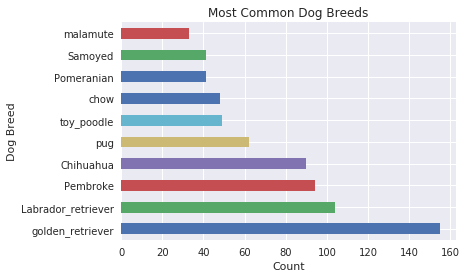

In [81]:
# Plotting on a horizontal bar

breeds.head(10).plot(kind = 'barh')

plt.title('Most Common Dog Breeds')
plt.xlabel('Count')
plt.ylabel('Dog Breed')

fig = plt.gcf() 
fig.savefig('output.png',bbox_inches='tight');

The  most common dog breed is golden_retriever. There are 155 of them.

#### How do dog breeds perform in the average rating?

In [82]:
rating_avg = archive.groupby('dog_breed').mean()
rating_avg

,tweet_id,rating_numerator,rating_denominator,favorite_count,retweet_count,confidence_level
dog_breed,,,,,,
Afghan_hound,8.041621e+17,9.666667,10.0,15591.000000,5130.666667,0.433959
Airedale,7.184489e+17,9.833333,10.0,4766.166667,1203.583333,0.583771
American_Staffordshire_terrier,7.545525e+17,10.133333,10.0,7627.000000,1779.600000,0.518511
Appenzeller,7.939334e+17,11.000000,10.0,6620.000000,1243.500000,0.503665
Australian_terrier,7.785921e+17,11.500000,10.0,10079.000000,2688.500000,0.307584
Bedlington_terrier,7.843395e+17,10.333333,10.0,22858.000000,7206.000000,0.286043
Bernese_mountain_dog,7.570201e+17,11.272727,10.0,6603.363636,1395.818182,0.766685
Blenheim_spaniel,7.404407e+17,11.100000,10.0,8374.000000,2228.000000,0.699588
Border_collie,7.457945e+17,10.583333,10.0,8108.000000,1921.166667,0.576845


##### Top 10 dog breeds according to average rating

In [83]:
breed_rating_top = rating_avg['rating_numerator'].sort_values(ascending = False)
breed_rating_top.head(10)

dog_breed
Bouvier_des_Flandres    13.000000
Saluki                  12.500000
briard                  12.333333
Tibetan_mastiff         12.250000
Border_terrier          12.142857
standard_schnauzer      12.000000
silky_terrier           12.000000
Gordon_setter           11.750000
Irish_setter            11.750000
Samoyed                 11.731707
Name: rating_numerator, dtype: float64

##### Bottom 10 dog breeds according to average rating

In [84]:
breed_rating_bottom = rating_avg['rating_numerator'].sort_values(ascending = False)
breed_rating_bottom.tail(10)

dog_breed
Welsh_springer_spaniel         9.500000
Boston_bull                    9.416667
dalmatian                      9.333333
Ibizan_hound                   9.250000
Tibetan_terrier                9.250000
None                           9.042904
Scotch_terrier                 9.000000
Walker_hound                   9.000000
soft-coated_wheaten_terrier    8.500000
Japanese_spaniel               5.000000
Name: rating_numerator, dtype: float64

The breed Bouvier_des_Flandres has the highest average rating of 13. Japanese_spaniel, with an average rating of 5 is the least rated dog breed.

#### Do dog breeds with high average rating have more retweets?

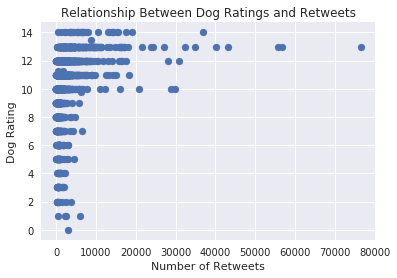

In [85]:
# Using scatter plot for display

plt.scatter(archive['retweet_count'], archive['rating_numerator'])
plt.title('Relationship Between Dog Ratings and Retweets')
plt.xlabel('Number of Retweets')
plt.ylabel('Dog Rating');

There is a possitive correlation between number of retweets and dog ratings. Higher rated dogs tend to have more retweets.

#### Most dogs are in what stage?

In [86]:
# Querying only dogs with dog stage added to the data.

stage = archive[archive['dog_stage'] != 'None']['dog_stage'].value_counts()
stage

pupper     209
doggo      62 
puppo      23 
floofer    8  
Name: dog_stage, dtype: int64

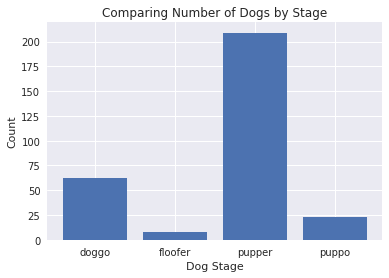

In [87]:
# Plotting a bar graph.

plt.bar(stage.index, stage)
plt.title('Comparing Number of Dogs by Stage')
plt.xlabel('Dog Stage')
plt.ylabel('Count');

Most dogs are in the pupper stage. There are 209 of them in all.

#### What names received most and least average likes?

In [88]:
archive.groupby('name')['favorite_count'].mean().sort_values(ascending = False)

name
Stephan       119053.0
Jamesy        115130.0
Duddles       98128.0 
Aja           73583.0 
Lilly         66430.0 
Canela        63694.0 
Pipsy         44977.0 
Barney        43666.0 
Alfy          41543.0 
Dewey         39948.0 
Emmy          39087.0 
Darla         39049.0 
Kenneth       37039.0 
Cupid         36223.0 
Darrel        36156.0 
Lassie        35088.0 
Zoey          34650.0 
Clifford      34204.0 
Ken           33918.0 
Maisey        33326.0 
Thor          32714.0 
Maya          32324.0 
Wiggles       32124.0 
Kody          31996.0 
Kevin         31925.5 
Klein         31253.0 
Vixen         30935.0 
Tilly         30882.0 
Hurley        30855.0 
Jimbo         30198.0 
               ...    
Butters       406.0   
Jo            384.0   
Ruffles       379.0   
Tedrick       372.0   
Kloey         363.0   
Maks          361.0   
Saydee        352.0   
Dook          350.0   
Anthony       344.0   
Ronduh        340.0   
Edd           337.0   
Josep         323.0   
Raphae

The dog(s) named Stephan received the highest average likes of 119092. Christoper on the other hand, received the least average likes of 174.

## Conclusion

On a closer look, the master data still contain some issues. However, it is of a better quality than the original data gathered. With the better quality data, it is a lot easier to gain insight into the data and arrive at right conclusions.

## Resources

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html

https://www.geeksforgeeks.org/matplotlib-pyplot-gca-in-python/

https://stackoverflow.com/questions/53983072/arrange-bar-chart-in-ascending-descending-order

https://www.geeksforgeeks.org/split-a-column-in-pandas-dataframe-and-get-part-of-it/

https://stackoverflow.com/questions/21291259/convert-floats-to-ints-in-pandas

https://www.datacamp.com/community/tutorials/python-data-type-conversion

https://www.sharpdesigns.xyz/pages/wrangle_act.html

https://www.kaggle.com/anshuls235/data-wrangling-explained

https://pandas.pydata.org/docs/reference/api/pandas.melt.html

https://medium.com/@durgaswaroop/reshaping-pandas-dataframes-melt-and-unmelt-9f57518c7738

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html